In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X = dataset.iloc[:,3:4].values
y = dataset.iloc[:,4].values
print(X.shape)

(400, 1)


In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 1)
(100, 1)
(300,)
(100,)


In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
y_pred = classifier.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[68  0]
 [32  0]]


In [9]:
w = classifier.coef_
b = classifier.intercept_
print("W : {}".format(w))
print("b : {}".format(b))

W : [[-2.07854175e-06]]
b : [-1.49368827e-10]


In [10]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

In [11]:
def hypothesis(x_sample,w,b):
    h = (x_sample * w).sum() + b
    return sigmoid(h)

In [12]:
m = X_test.shape[0]
y_pred = np.zeros(X_test.shape[0])
for i in range(m):
    y_pred[i] = hypothesis(X_test[i],w,b)

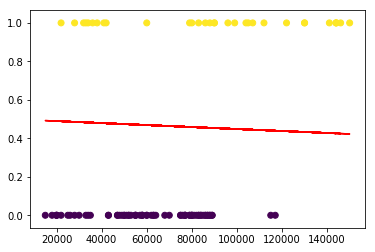

In [13]:
plt.scatter(X_test,y_test,c=y_test)
plt.plot(X_test,y_pred,'r')